In [178]:
import pandas as pd
import math

from sklearn.preprocessing import LabelEncoder
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('./csv/train.csv')
df_store = pd.read_csv('./csv/stores.csv')
df_feat = pd.read_csv('./csv/features.csv')


In [179]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_feat['Date'] = pd.to_datetime(df_feat['Date'])

In [180]:
df = pd.merge(df_train, df_feat, on=['Store', 'Date', 'IsHoliday'], how='left' )
df = pd.merge(df, df_store, on=['Store'], how='left' )
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [181]:
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.week
df['month'] = df['Date'].dt.month

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [182]:
num_feat = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
           'CPI', 'Unemployment', 'Size']
cat_feat = ['Store', 'Dept', 'IsHoliday', 'Type', 'year', 'month', 'week']
target = ['Weekly_Sales']

# Stats and Feature Counts

In [183]:
df[target + num_feat].describe()

,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


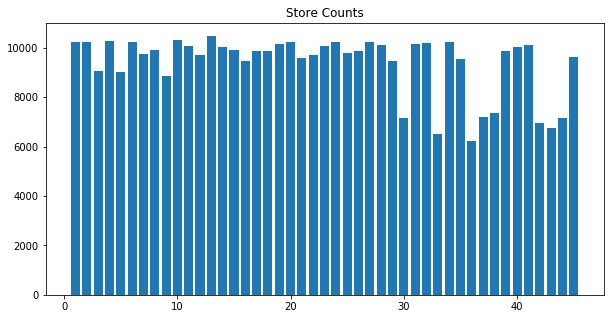

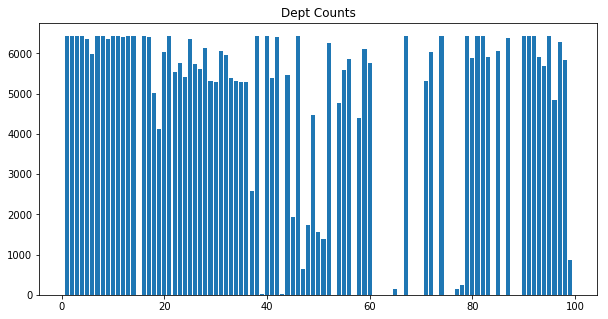

In [184]:
plt.figure(figsize=(10, 5))
plt.title('Store Counts')
plt.bar(df['Store'].value_counts().index, np.array( df['Store'].value_counts()))
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Dept Counts')
plt.bar(df['Dept'].value_counts().index, np.array( df['Dept'].value_counts()))
plt.show()

Text(0,0.5,'Counts')

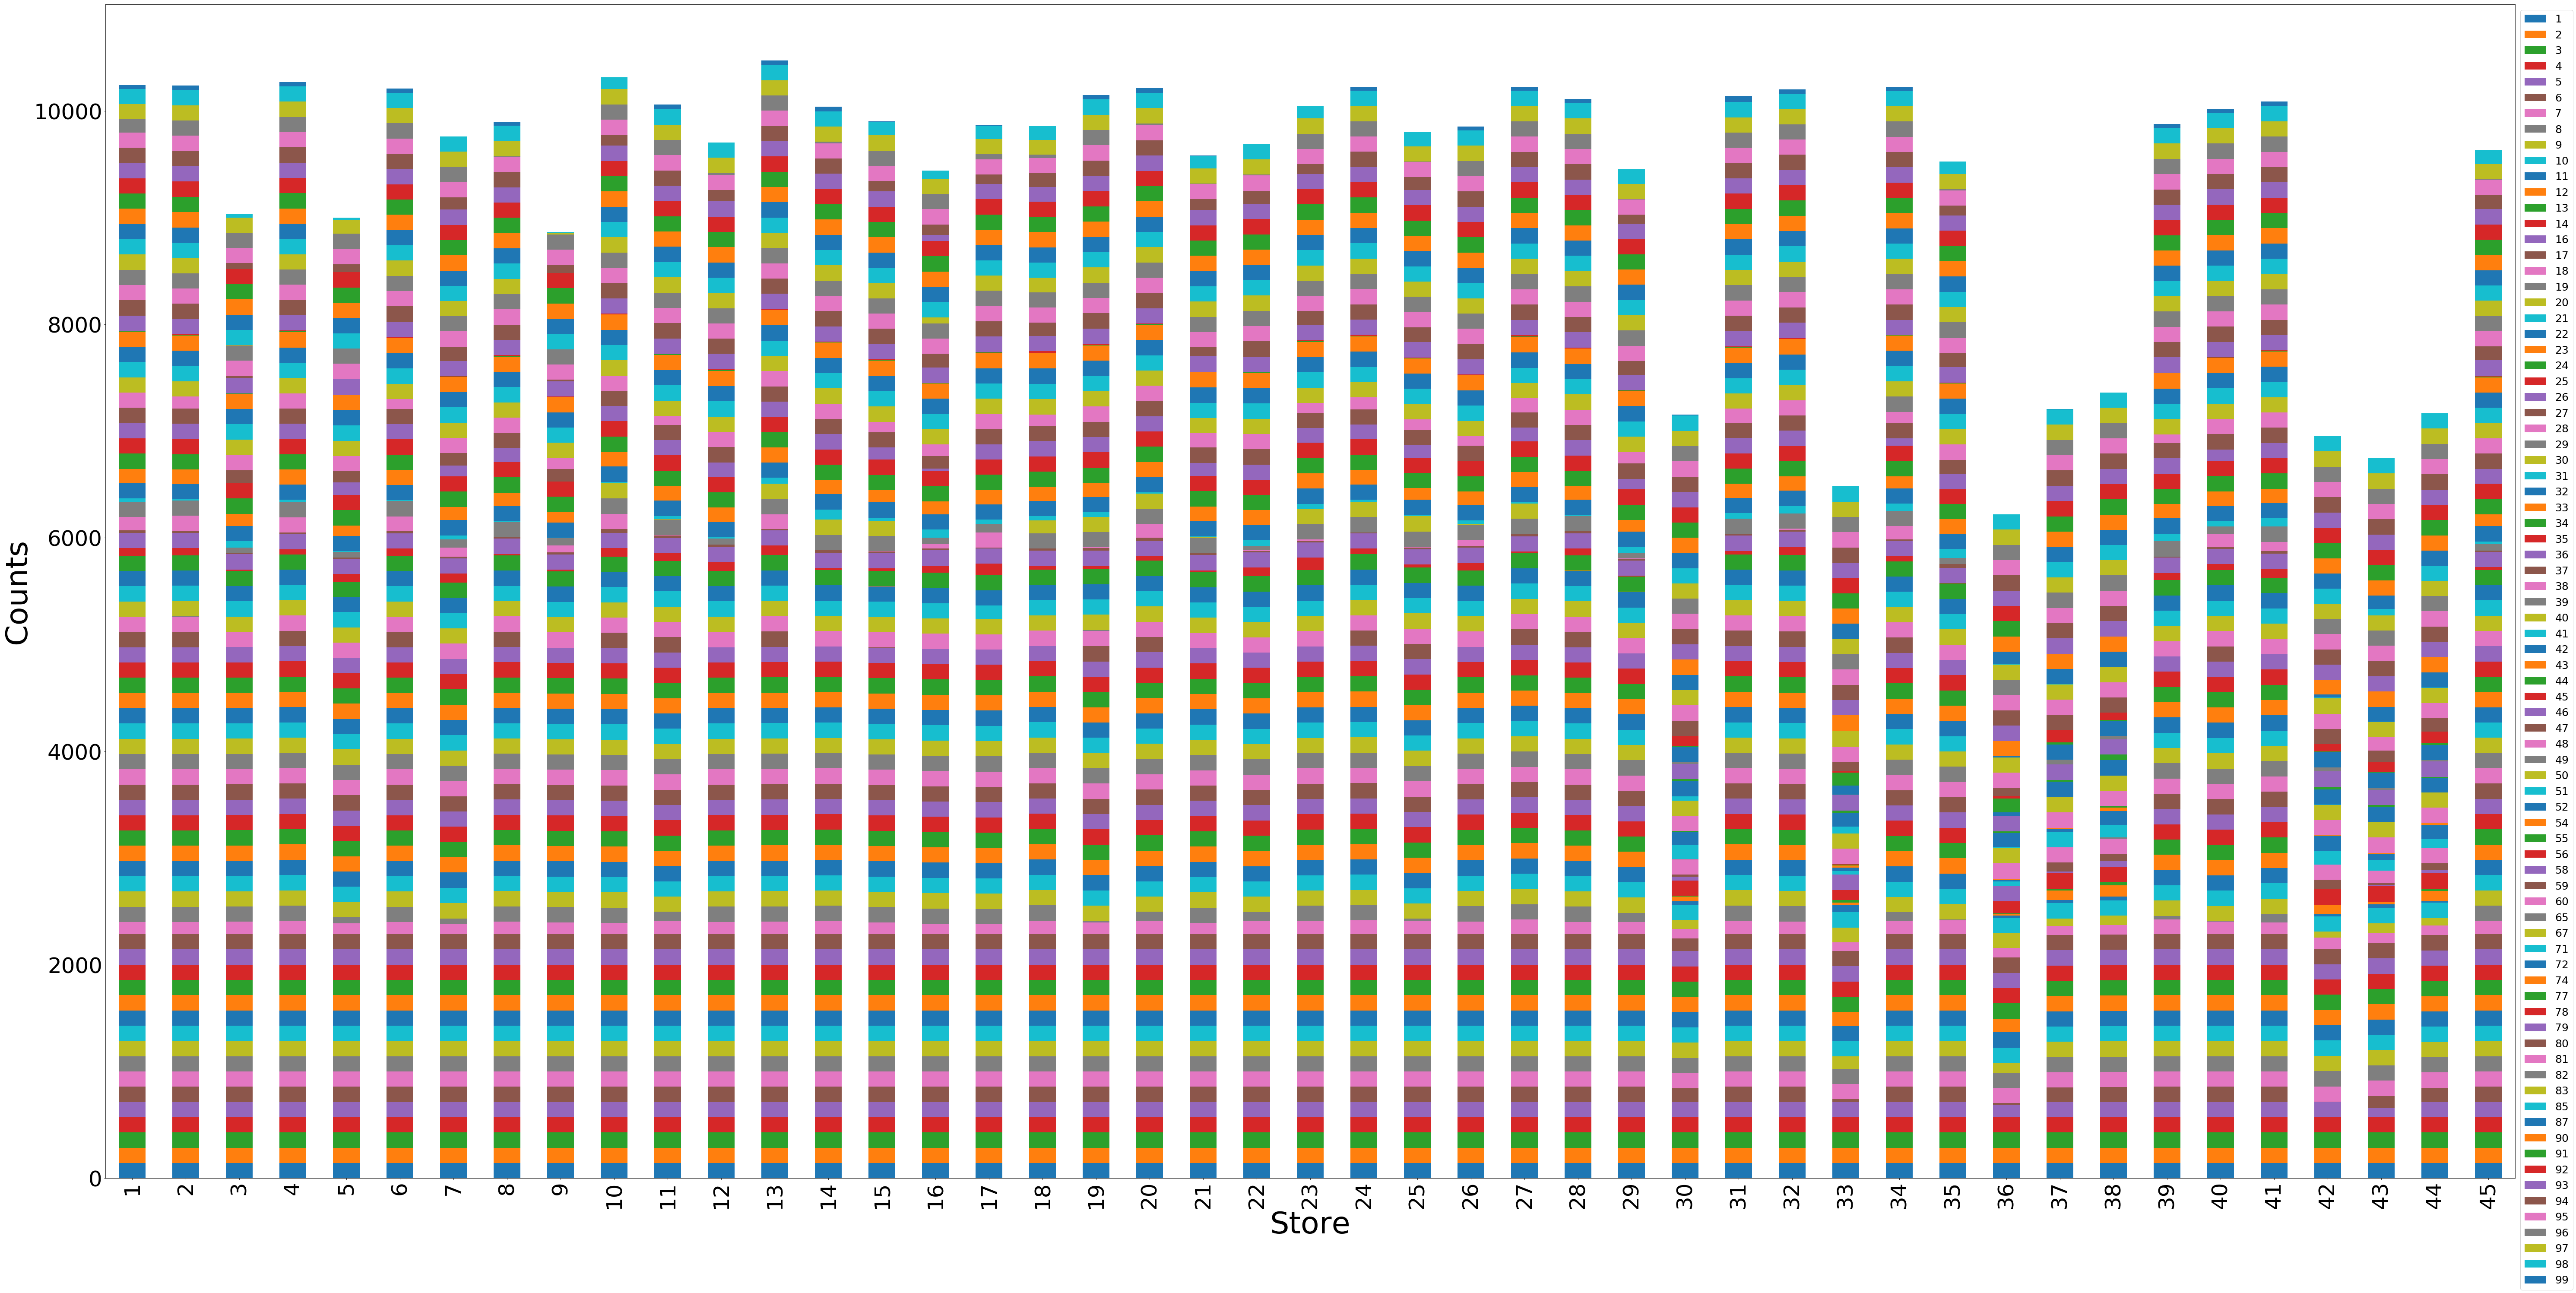

In [185]:
pivot = df.pivot_table(index=['Store'], columns='Dept', aggfunc='size', fill_value=0)
cols = np.array(pivot.columns)
tmp = pd.DataFrame(pivot.to_numpy(), columns = cols)
tmp['Store'] = np.array( pivot.index )
ax = tmp.plot.bar(x='Store', stacked=True, figsize=(100,50), fontsize=50)
ax.legend(bbox_to_anchor=(1, 1), fontsize=25)
ax.set_xlabel('Store', fontsize=70)
ax.set_ylabel('Counts', fontsize=70)

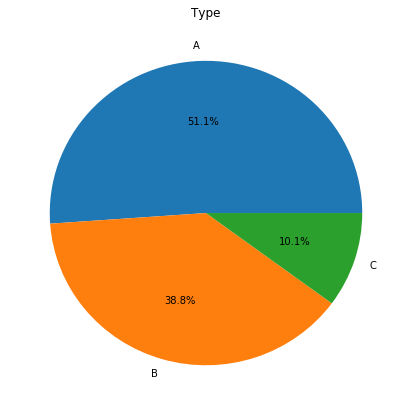

In [186]:
plt.figure(figsize=(7, 7))
plt.title('Type')
plt.pie(x=df['Type'].value_counts(), labels=df['Type'].value_counts().index,  autopct="%1.1f%%")
plt.show()

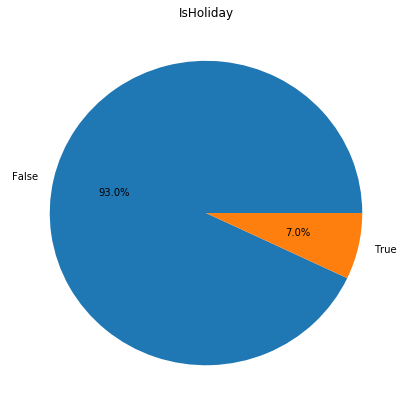

In [187]:
plt.figure(figsize=(7, 7))
plt.title('IsHoliday')
plt.pie(x=df['IsHoliday'].value_counts(), labels=['False', 'True'],  autopct="%1.1f%%")
plt.show()

# Categorical Feature: Relation with Weekly_Sales

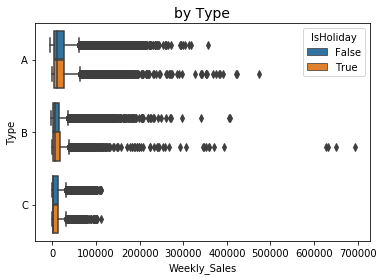

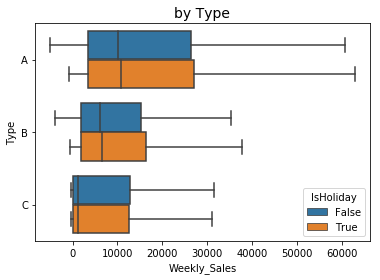

In [188]:
ax = sns.boxplot(y=df['Type'], x=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = True)
ax.set_title('by Type', size=14)
plt.show()

ax = sns.boxplot(y=df['Type'], x=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = False)
ax.set_title('by Type', size=14)
plt.show()

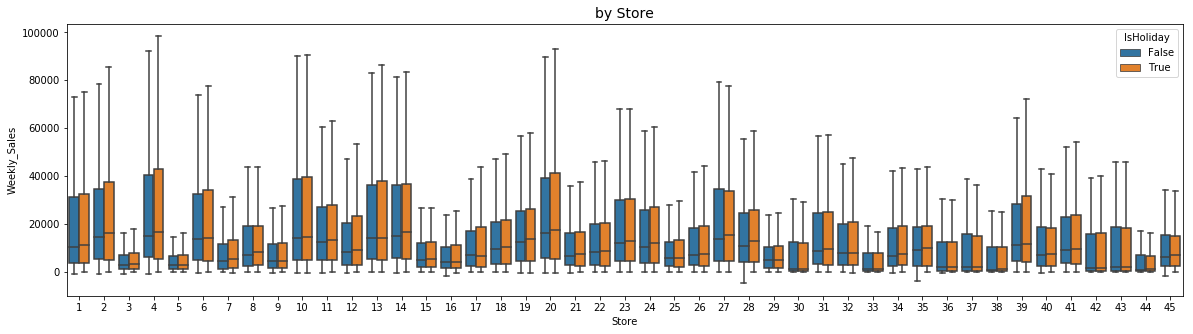

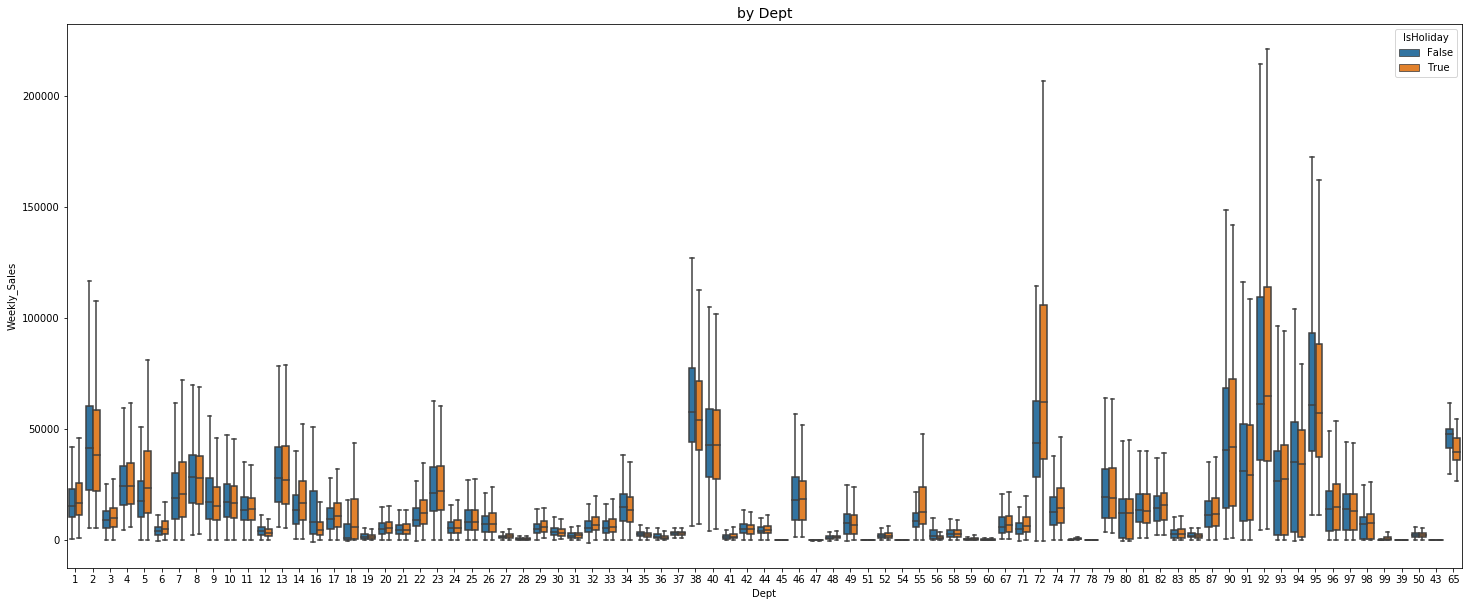

In [189]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x=df['Store'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = False)
ax.set_title('by Store', size=14)
plt.show()

plt.figure(figsize=(25,10))
ax = sns.boxplot(x=df['Dept'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = False)
ax.set_title('by Dept', size=14)
plt.show()

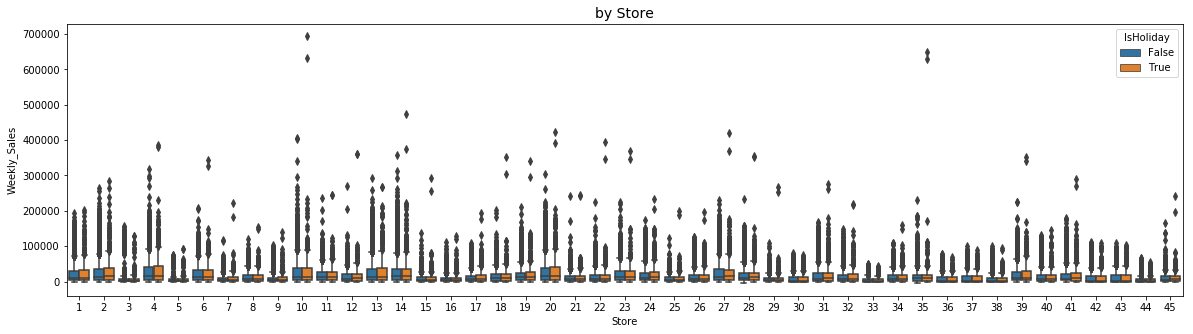

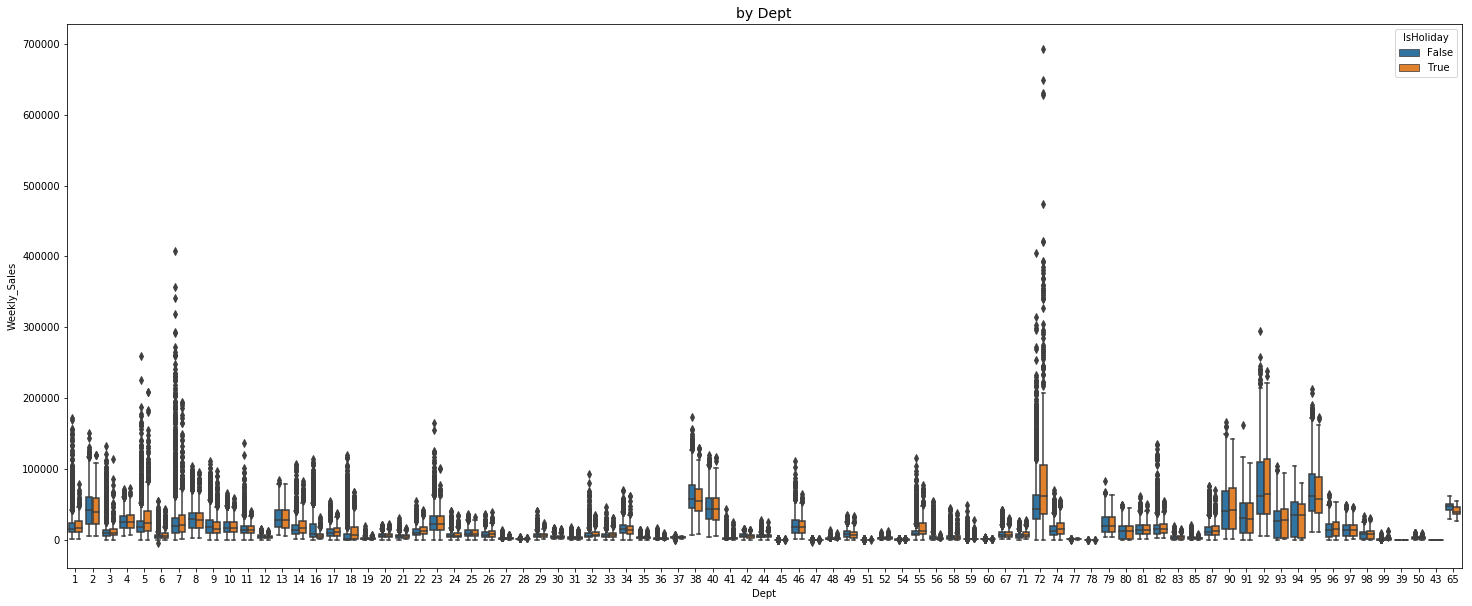

In [190]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x=df['Store'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = True)
ax.set_title('by Store', size=14)
plt.show()

plt.figure(figsize=(25,10))
ax = sns.boxplot(x=df['Dept'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = True)
ax.set_title('by Dept', size=14)
plt.show()

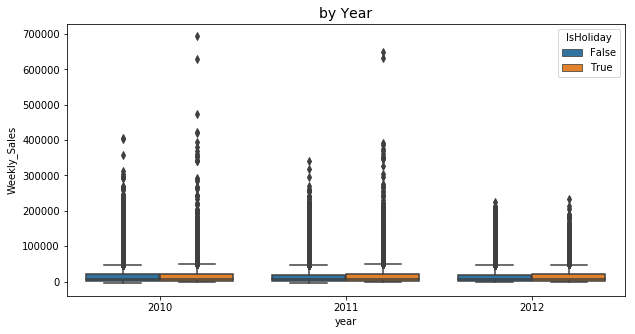

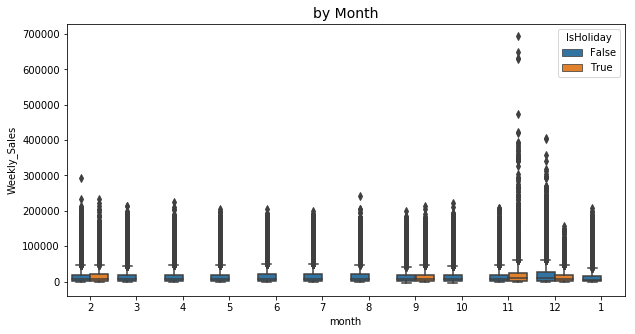

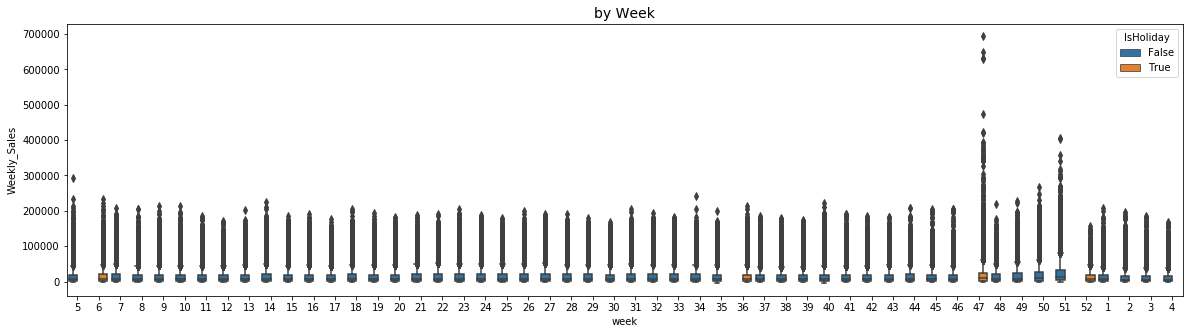

In [191]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=df['year'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = True)
ax.set_title('by Year', size=14)
plt.show()

plt.figure(figsize=(10,5))
ax = sns.boxplot(x=df['month'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = True)
ax.set_title('by Month', size=14)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.boxplot(x=df['week'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = True)
ax.set_title('by Week', size=14)
plt.show()

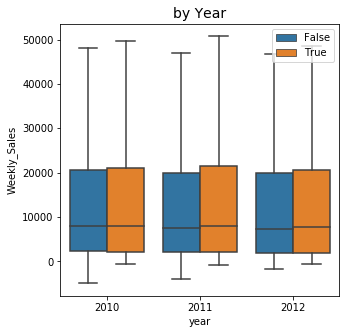

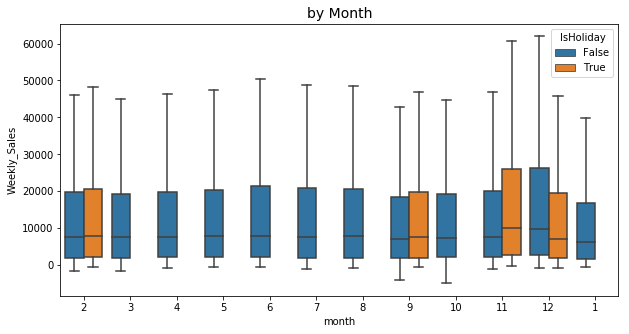

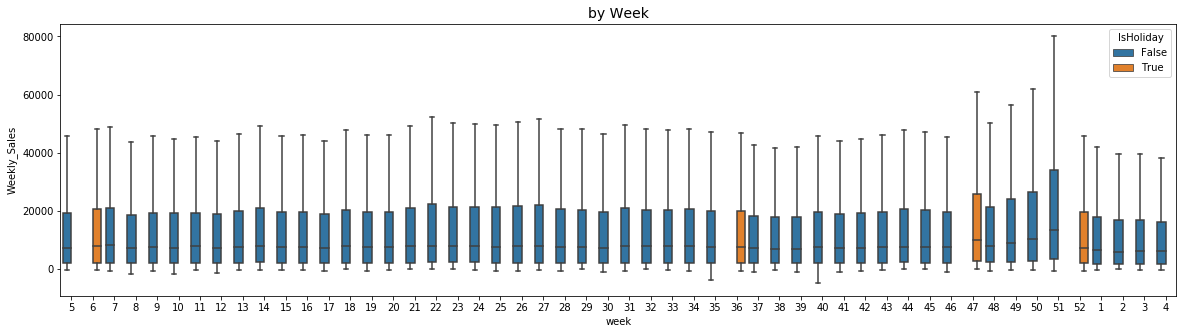

In [192]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(x=df['year'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = False)
ax.set_title('by Year', size=14)
ax.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10,5))
ax = sns.boxplot(x=df['month'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = False)
ax.set_title('by Month', size=14)
plt.show()

plt.figure(figsize=(20,5))
ax = sns.boxplot(x=df['week'].astype(str), y=df['Weekly_Sales'], hue=df['IsHoliday'], showfliers = False)
ax.set_title('by Week', size=14)
plt.show()

# Time Series

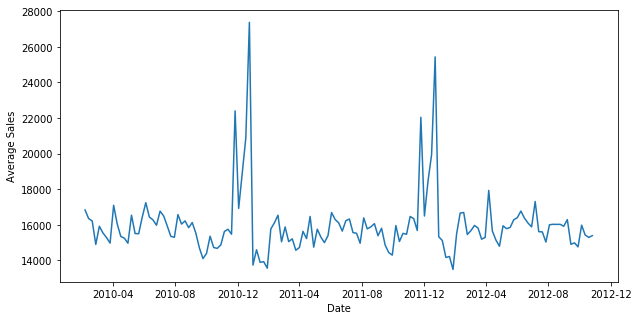

In [193]:
tmp = df.groupby('Date')['Weekly_Sales'].mean()
plt.figure(figsize=(10,5))
ax = sns.lineplot(y =  tmp, x = tmp.index )
ax.set_ylabel('Average Sales')
plt.show()

# Numeric Feature: Correlations with Weekly Sales

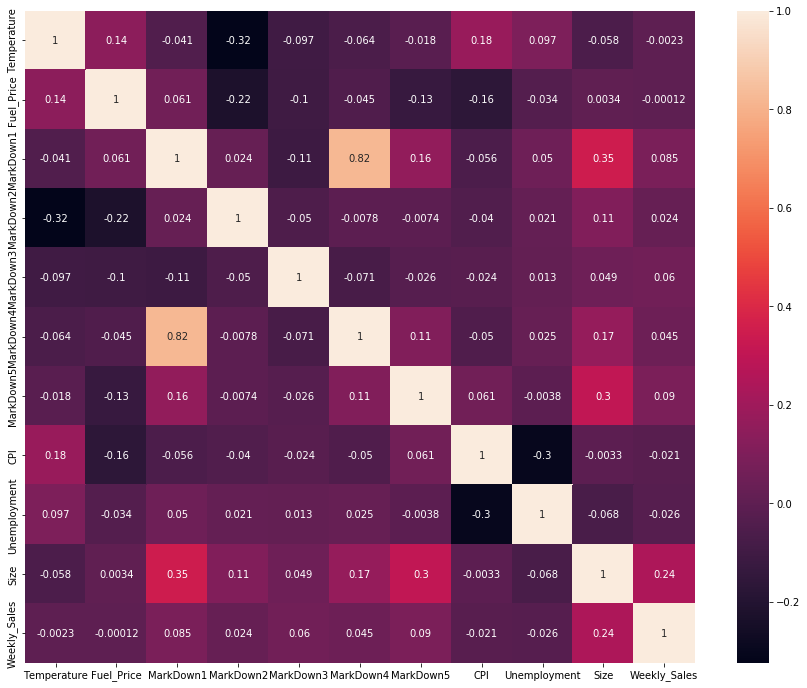

In [203]:
plt.figure(figsize=(15,12))
sns.heatmap(df[num_feat+target].corr(),annot=True)